In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
from helper_functions import *


ticker = 'TSLA'
date_range = ['2020-01-01', '2021-03-05']
date = '2021-03-10'
window = 'year1month4'
interval = '5min'
website = 'alphavantage'

In [2]:
price = load_price_df(ticker, date)
df = load_news_df(ticker, date_range, website='finnhub')
price_timestamp(df)
get_prices(df, price)
df

,headline,related,source,summary,price_ts,price,price_1d,price_1h
datetime,,,,,,,,
2021-03-05 07:30:41,Investing In Intangible Assets Revisited,TSLA,seekingalpha.com,"Intangible assets are becoming an increasingly important portion of not only company balance sheets, but also their ability to grow and generate profits.",2021-03-04 18:00:00,614.6000,596.520,620.5000
2021-03-05 00:00:00,"Tesla Should Sell Its Bitcoin and Buy Back Shares To Create 'Positive Momentum,' Says Analyst",TSLA,benzinga,"Tesla Inc (NASDAQ: TSLA) could create a “positive momentum” if its sold its Bitcoin (CRYPTO: BTC) holdings and initiated a buyback of its stock, according to...",2021-03-04 18:00:00,614.6000,596.520,620.5000
2021-03-05 00:00:00,"Tesla Should Sell Its Bitcoin and Buy Back Shares To Create 'Positive Momentum,' Says Analyst",TSLA,benzinga,"Tesla Inc (NASDAQ: TSLA) could create a “positive momentum” if its sold its Bitcoin (CRYPTO: BTC) holdings and initiated a buyback of its stock, according to...",2021-03-04 18:00:00,614.6000,596.520,620.5000
2021-03-04 21:33:00,Tesla Inc. stock underperforms Thursday when compared to competitors,TSLA,marketwatch,"Shares of Tesla Inc. slid 4.86% to $621.44 Thursday, on what proved to be an all-around grim trading session for the stock market, with the NASDAQ Composite...",2021-03-04 18:00:00,614.6000,596.520,620.5000
2021-03-04 13:48:00,EV Stocks NIO and Tesla Are Falling Again. It’s Not the Companies’ Fault.,TSLA,MarketWatch,"High-flying shares of electric-vehicle makers are falling yet again. Recent declines have been jarring, but external factors are to blame.",2021-03-04 13:50:00,605.7659,599.935,620.7223
...,...,...,...,...,...,...,...,...
2021-02-12 00:03:17,"Today's Hot Mover- Tesla, Inc. (NASDAQ:TSLA) with the stream of 0.85% - Stocks Equity",TSLA,http://www.stocksequity.com,"On Thursday, shares of Tesla, Inc. (NASDAQ:TSLA) reached at $811.66 price level during last trade its distance from 20 days simple moving average was -4.27%, and its distance from 50 …",2021-02-11 18:00:00,811.1900,815.700,802.6100
2021-02-12 00:00:00,"5 Fun Takeaways From Elon Musk's Latest Chat With Joe Rogan: Bond, 'Borat' And More",TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) CEO Elon Musk was on Joe Rogan's podcast for the third time and the world's richest person kicked off the show with an ode to Sacha Baron Cohen...,2021-02-11 18:00:00,811.1900,815.700,802.6100
2021-02-12 00:00:00,Elon Musk Plans For Tesla Roadster To Be Able To Hover 6 Feet In The Air,TSLA,benzinga,"Tesla Inc's (NASDAQ: TSLA) refreshed Model S Plaid will be delivered to customers starting this month, with the fastest 0-60 time of any production car at 1.99 seconds....",2021-02-11 18:00:00,811.1900,815.700,802.6100


In [3]:
df['change_1h'] = (df['price_1h'] - df['price'])/df['price']
df['change_1d'] = (df['price_1d'] - df['price'])/df['price']

# Sentiment analysis

In [4]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()
scores = df['headline'].apply(vader.polarity_scores)
df = df.join(pd.DataFrame.from_records(scores, index=df.index))

In [47]:
#df.groupby(df.index.date)['compound'].mean()
#df.groupby(df.index.date)['change_1d'].mean()
df.loc['2021-02-15']

,headline,related,source,summary,price_ts,price,price_1d,price_1h,change_1h,change_1d
datetime,,,,,,,,,,
2021-02-15 15:49:57,Buy CCIV Stock to Get In on the Ground Floor of Lucid Motors,TSLA,Nasdaq,"InvestorPlace - Stock Market News, Stock Advice & Trading Tips",2021-02-15 15:50:00,NaN,795.5767,NaN,NaN,NaN
2021-02-15 11:41:26,"ARK Innovation ETF: Loads Of Upside, But Significant Risk",TSLA,seekingalpha.com,"Neutral thesis on ARKK, arguing that it will outperform as long as current market conditions remain; more downside than the S&P 500 or even NASDAQ 100 in the bear market.",2021-02-15 11:40:00,NaN,800.0100,NaN,NaN,NaN
2021-02-15 10:50:05,FOREX-Dollar weakens as market optimism lifts riskier currencies,TSLA,Nasdaq,"The U.S. dollar held near two-week lows on Monday, as optimism about COVID-19 vaccine rollouts and a planned $1.9 trillion U.S. stimulus package offered a boost to riskier currencies, stock markets and commodity prices.",2021-02-15 10:50:00,NaN,806.3596,NaN,NaN,NaN
2021-02-15 10:35:22,Tesla to set up electric car manufacturing unit in southern India,TSLA,cnbc,"Tesla will set up an electric-car manufacturing unit in the southern Indian state of Karnataka, according to a government document seen by Reuters on Saturday.",2021-02-15 10:35:00,NaN,810.2500,NaN,NaN,NaN
2021-02-15 09:37:10,EXPLAINER-Bitcoin's mainstream charge raises stakes for central bank digital cash,TSLA,Nasdaq,"As cryptocurrencies increasingly go mainstream, pressure is growing on the world's biggest central banks to move forward with their plans to issue digital cash and fend off private sector threats to traditional money.",2021-02-15 09:35:00,NaN,816.3200,NaN,NaN,NaN
2021-02-15 12:30:00,What Is Berkshire Hathaway’s Mystery Stock? Big Investment by Warren Buffett Could Be Disclosed Tomorrow.,TSLA,marketwatch,"A large investment by Warren Buffett’s conglomerate, previously confidential, could be disclosed in a 13F filing tomorrow.",2021-02-15 12:30:00,NaN,799.7400,NaN,NaN,NaN
2021-02-15 07:18:51,FOREX-Dollar weakens as market optimism lifts riskier currencies,TSLA,Nasdaq,"The safe-haven dollar started the week near two-week lows on Monday, as optimism about COVID-19 vaccine rollouts and a planned $1.9 trillion U.S. stimulus package drove up riskier currencies and stock markets across Europe and Asia.",2021-02-12 18:00:00,815.7,NaN,NaN,NaN,NaN
2021-02-15 06:30:00,This Is Where the Real Stock Market Bubble Is,TSLA,MarketWatch,We went bubble hunting—and found a likely candidate in one tech sector.,2021-02-12 18:00:00,815.7,NaN,NaN,NaN,NaN
2021-02-15 04:50:50,FOREX-Dollar on back foot as market optimism lifts riskier currencies,TSLA,Nasdaq,"The safe haven dollar started the week pinned near two-week lows on Monday, as optimism about COVID-19 vaccine rollouts and a planned $1.9 trillion U.S. stimulus package drove up riskier currencies and stock markets across Europe and Asia.",2021-02-12 18:00:00,815.7,NaN,NaN,NaN,NaN


In [18]:
df['price_ts']

datetime
2021-03-05 07:30:41   2021-03-04 18:00:00
2021-03-05 00:00:00   2021-03-04 18:00:00
2021-03-05 00:00:00   2021-03-04 18:00:00
2021-03-04 21:33:00   2021-03-04 18:00:00
2021-03-04 13:48:00   2021-03-04 13:50:00
                              ...        
2021-02-12 00:03:17   2021-02-11 18:00:00
2021-02-12 00:00:00   2021-02-11 18:00:00
2021-02-12 00:00:00   2021-02-11 18:00:00
2021-02-12 00:00:00   2021-02-11 18:00:00
2021-02-12 00:00:00   2021-02-11 18:00:00
Name: price_ts, Length: 500, dtype: datetime64[ns]

In [46]:
price[(price.index > '2021-02-13') & (price.index <= '2021-02-17')] # no price data for 15th

,Open,High,Low,Close,Volume
2021-02-16 20:00:00,792.0500,792.4500,791.2000,791.4200,16958
2021-02-16 19:55:00,792.7900,792.9999,792.3000,792.3499,8526
2021-02-16 19:50:00,793.0900,793.5800,792.8000,792.8000,9725
2021-02-16 19:45:00,793.0900,793.3500,793.0000,793.0900,15069
2021-02-16 19:40:00,793.3000,793.8300,793.0500,793.2700,4810
...,...,...,...,...,...
2021-02-16 04:30:00,817.1000,817.5800,816.0000,816.4000,5949
2021-02-16 04:25:00,818.7300,818.7300,818.7300,818.7300,644
2021-02-16 04:20:00,820.1000,820.1000,820.0000,820.0000,4263
2021-02-16 04:10:00,821.9400,822.3000,821.3100,822.3000,1719


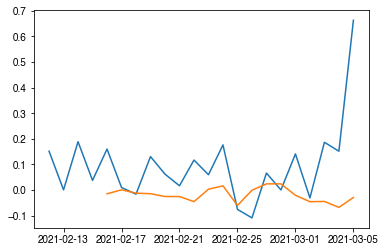

In [6]:
mean_df = df.groupby([df.index.date]).mean().unstack()
plt.plot(mean_df.xs('compound'))
plt.plot(mean_df.xs('change_1d'))